In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[100.55 100.6  100.65 ...  98.73  98.72  99.05]
 [100.36 100.69 100.18 ...  99.38  99.45  99.19]
 [101.18 100.17 100.46 ...  99.21 100.    99.53]
 ...
 [ 75.46  77.66  79.89 ...  60.95  60.77  60.92]
 [ 78.5   81.08  82.62 ...  63.23  62.31  62.79]
 [ 80.85  82.93  86.04 ...  65.77  65.5   66.69]]


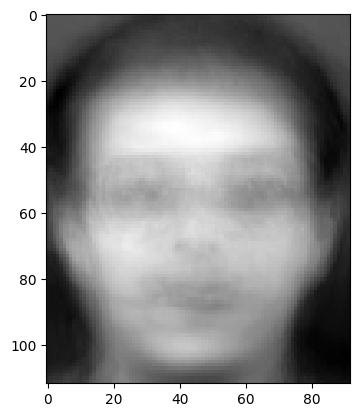

In [2]:
filepaths = []
for i in range(1, 11):
    for j in range(1, 11):
        filepaths.append(f"image_dataset/{i:02d}-{j:02d}.raw")

height, width = 112, 92
num_images = len(filepaths)

face_m = np.zeros((height, width), dtype=np.float32)
face = np.zeros((num_images, height, width), dtype=np.uint8)

for i in range(num_images):
    fid = open(filepaths[i], "rb")
    face_image = np.reshape(np.fromfile(fid, dtype='uint8', sep=""), [height, width])
    fid.close()
    
    face[i] = face_image
    face_m += face_image.astype(np.float32)
    
face_m /= num_images

print(face_m)

plt.imshow(face_m, cmap='gray')
plt.savefig('mean_face.jpg', format='jpg', bbox_inches='tight')

In [3]:
# 2차원을 1차원으로
face_1d = np.zeros((num_images, height * width), dtype=np.float32)

# reshape(-1): 2d를 1d로
for i in range(num_images):
    face_1d[i] = (face[i].reshape(-1) - face_m.reshape(-1))

#face_1d = np.matrix(face_1d)

print(face_1d)

# cov_matrix = np.dot(face_1d, face_1d.T) / (num_images - 1)
cov_matrix = np.dot(face_1d, face_1d.T)


print(cov_matrix)

eigenvalues, eigenvector = np.linalg.eigh(cov_matrix)

[[-66.55     -66.6      -67.65     ... -28.769997 -25.5      -33.690002]
 [-58.550003 -59.6      -56.65     ... -23.769997 -22.5      -25.690002]
 [-56.550003 -57.6      -68.65     ... -22.769997 -22.5      -29.690002]
 ...
 [ 36.449997  34.4       35.35     ... -46.769997 -41.5      -25.690002]
 [ 37.449997  34.4       34.35     ... -42.769997 -47.5      -31.690002]
 [ 39.449997  33.4       34.35     ... -40.769997 -39.5      -17.690002]]
[[ 18072442.   11998514.   12310646.  ...  -4919085.   -7868193.5
   -9845303. ]
 [ 11998514.   26154088.   17475324.  ...  -6971300.5 -10517681.
  -11520295. ]
 [ 12310646.   17475324.   22336992.  ...  -6135486.   -8822735.
  -11215771. ]
 ...
 [ -4919085.   -6971300.5  -6135486.  ...  18547500.   14316159.
   11796097. ]
 [ -7868193.5 -10517681.   -8822735.  ...  14316159.   20059044.
   17027172. ]
 [ -9845303.  -11520295.  -11215771.  ...  11796097.   17027172.
   25463284. ]]


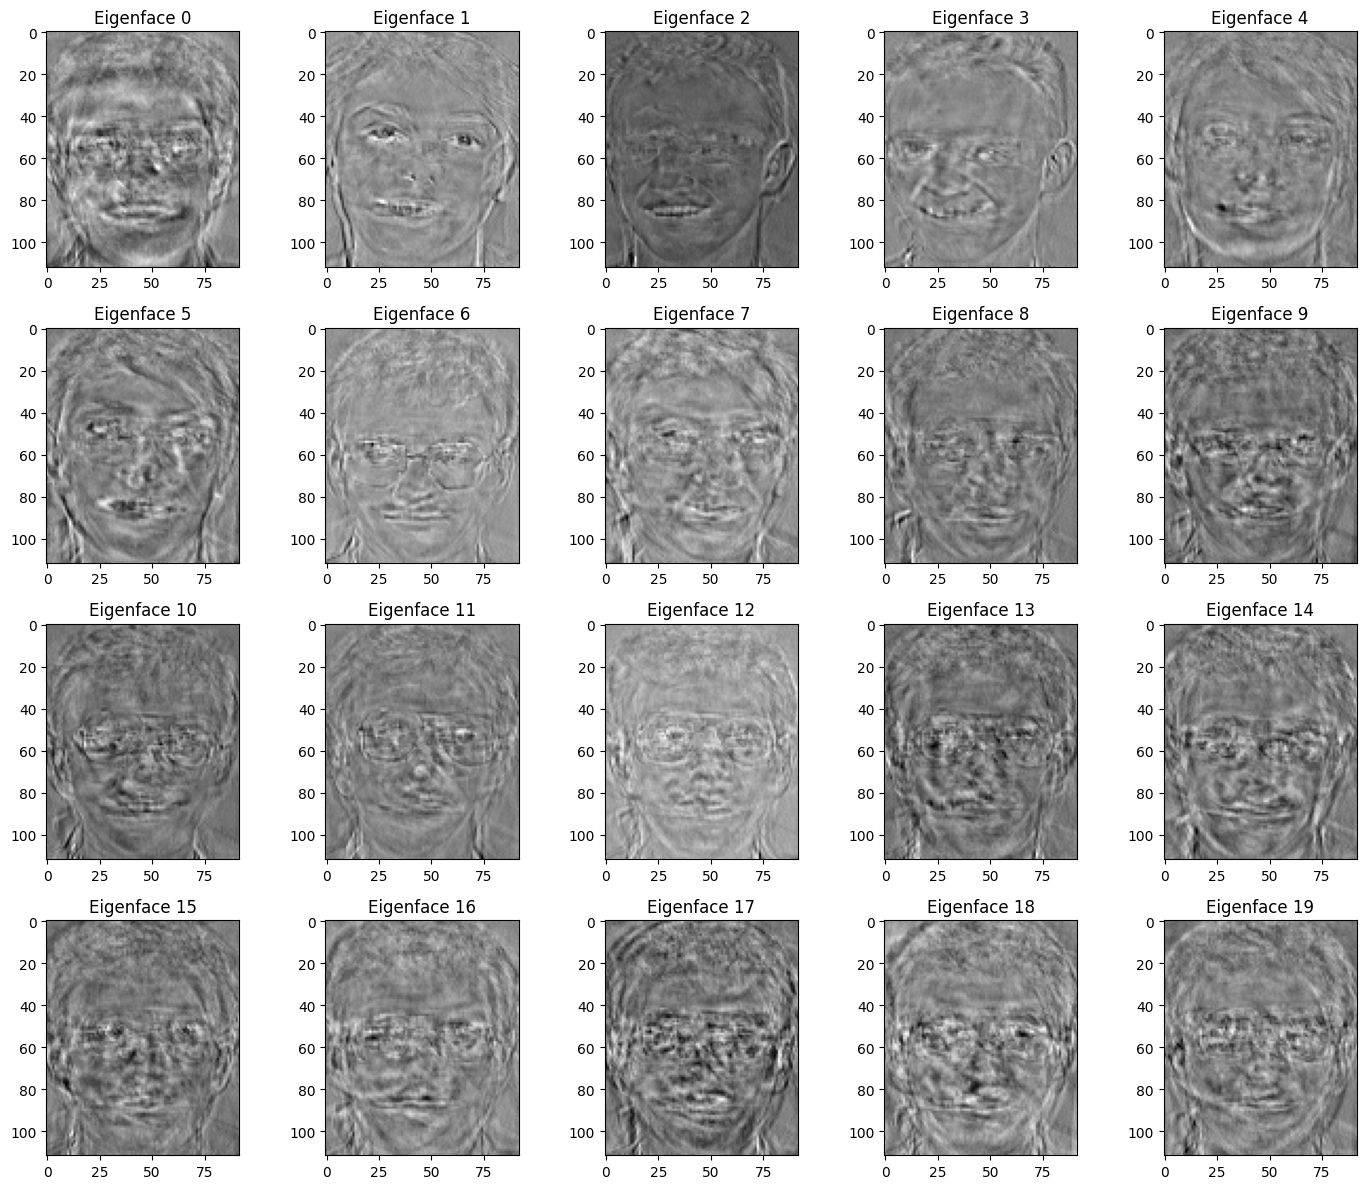

In [4]:
eigen_faces = np.zeros((num_images, height * width), dtype=np.float32)

for i in range(num_images):
    eigen_face = np.zeros(height * width, dtype=np.float32)
    for j in range(num_images):
        eigen_face += eigenvector[j, i] * face_1d[j]
        
    # 정규화
    eigen_faces[i] = eigen_face / np.linalg.norm(eigen_face)

# (4) 큰 고유값 기준으로 내림차순 정렬
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvector = eigenvector[:, sorted_idx]

# eigen_faces = np.dot(eigenvector.T, face_1d)
# eigen_faces = eigen_faces / np.linalg.norm(eigen_faces, axis=1, keepdims=True)  # 정규화

k = 20
eigen_faces = eigen_faces[:k]

# 시각화
rows = (k + 4) // 5  # 5개씩 자동으로 줄 나누기
plt.figure(figsize=(15, 3 * rows))
for i in range(k):
    plt.subplot(rows, 5, i+1)
    eigenface_img = eigen_faces[i].reshape(height, width)
    eigenface_img = (eigenface_img - np.min(eigenface_img)) / (np.max(eigenface_img) - np.min(eigenface_img)) * 255

    plt.imshow(eigenface_img, cmap='gray')
    plt.title(f'Eigenface {i}')
    plt.tight_layout()


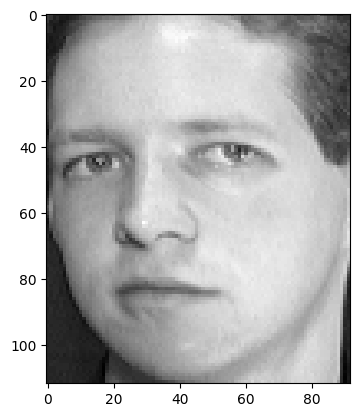

In [5]:
plt.imshow(face[6], cmap='gray')